In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [137]:
responses = pd.read_csv('./data/NearMissResponses.csv')

In [138]:
filtered = responses.loc[responses['Choose the highest level of happiness that can be felt by any human. [Happiness]'] == 9]
filtered = filtered.loc[responses['What was the numerical scale for the responses? (format as "x-y")'] == '1-9']
print('before filtering:', responses.shape)
print('after filtering: ', filtered.shape)

before filtering: (21, 41)
after filtering:  (19, 41)


In [139]:
responses = responses.drop(['Timestamp', 'Choose the highest level of happiness that can be felt by any human. [Happiness]',
                      'What was the numerical scale for the responses? (format as "x-y")',
                      'What is your name? (optional)',
                       'Any other comments?'], axis=1)
means = responses.mean()
print(len(means))
means

36


Scenario 1 [Happiness]         7.666667
Scenario 1 [Sadness]           1.047619
Scenario 1 [Surprise]          5.761905
Scenario 1 [Disappointment]    1.047619
Scenario 2 [Happiness]         8.238095
Scenario 2 [Sadness]           1.047619
Scenario 2 [Surprise]          7.571429
Scenario 2 [Disappointment]    1.000000
Scenario 3 [Happiness]         8.238095
Scenario 3 [Sadness]           1.095238
Scenario 3 [Surprise]          7.476190
Scenario 3 [Disappointment]    1.095238
Scenario 4 [Happiness]         3.380952
Scenario 4 [Sadness]           3.666667
Scenario 4 [Surprise]          2.285714
Scenario 4 [Disappointment]    4.857143
Scenario 5 [Happiness]         1.857143
Scenario 5 [Sadness]           6.142857
Scenario 5 [Surprise]          5.190476
Scenario 5 [Disappointment]    7.571429
Scenario 6 [Happiness]         2.714286
Scenario 6 [Sadness]           4.571429
Scenario 6 [Surprise]          4.380952
Scenario 6 [Disappointment]    6.571429
Scenario 7 [Happiness]         5.619048


In [140]:
data = {}
emotions = ['Happiness', 'Sadness', 'Surprise', 'Disappointment']
for i in range(0,4):
    data.update({emotions[i]: [means[0 + i], means[4 + i], means[8 + i], means[12 + i], means[16 + i],
                               means[20 + i], means[24 + i], means[28 + i], means[32 + i]]})
index = []
for i in range(0,10):
    index.append('Scenario ' + str(i))

In [141]:
data

{'Disappointment': [1.0476190476190477,
  1.0,
  1.0952380952380953,
  4.8571428571428568,
  7.5714285714285712,
  6.5714285714285712,
  2.7142857142857144,
  5.6190476190476186,
  2.1904761904761907],
 'Happiness': [7.666666666666667,
  8.2380952380952372,
  8.2380952380952372,
  3.3809523809523809,
  1.8571428571428572,
  2.7142857142857144,
  5.6190476190476186,
  4.8095238095238093,
  6.1428571428571432],
 'Sadness': [1.0476190476190477,
  1.0476190476190477,
  1.0952380952380953,
  3.6666666666666665,
  6.1428571428571432,
  4.5714285714285712,
  2.2857142857142856,
  3.3333333333333335,
  2.1904761904761907],
 'Surprise': [5.7619047619047619,
  7.5714285714285712,
  7.4761904761904763,
  2.2857142857142856,
  5.1904761904761907,
  4.3809523809523814,
  3.0476190476190474,
  5.1428571428571432,
  5.333333333333333]}

In [142]:
df = pd.DataFrame(data = data)
names = ['middle100', '100near25', '100near60', 'middle25', '25near100', '25near60', 'middle60', '60near100', '60near25']
df['names'] = names
df = df.set_index('names')
df

,Disappointment,Happiness,Sadness,Surprise
names,,,,
middle100,1.047619,7.666667,1.047619,5.761905
100near25,1.000000,8.238095,1.047619,7.571429
100near60,1.095238,8.238095,1.095238,7.476190
middle25,4.857143,3.380952,3.666667,2.285714
25near100,7.571429,1.857143,6.142857,5.190476
25near60,6.571429,2.714286,4.571429,4.380952
middle60,2.714286,5.619048,2.285714,3.047619
60near100,5.619048,4.809524,3.333333,5.142857
60near25,2.190476,6.142857,2.190476,5.333333


In [143]:
scenario = ['Middle', 'Near Hit', 'Near Hit', 'Middle', 'Near Miss', 'Near Miss', 'Middle', 'Near Miss', 'Near Hit']
df['Scenario'] = scenario
groupby_scenario = df.groupby('Scenario').describe()
groupby_scenario

Disappointment                                                    \
                   count      mean       std       min       25%       50%   
Scenario                                                                     
Middle               3.0  2.873016  1.909716  1.047619  1.880952  2.714286   
Near Hit             3.0  1.428571  0.661545  1.000000  1.047619  1.095238   
Near Miss            3.0  6.587302  0.976287  5.619048  6.095238  6.571429   

                              Happiness              ...      Sadness  \
                75%       max     count      mean    ...          75%   
Scenario                                             ...                
Middle     3.785714  4.857143       3.0  5.555556    ...     2.976190   
Near Hit   1.642857  2.190476       3.0  7.539683    ...     1.642857   
Near Miss  7.071429  7.571429       3.0  3.126984    ...     5.357143   

                    Surprise                                          \
                max    count      mean       std       min       25%   
Scenario                                                               
Middle     3.666667      3.0  3.698413  1.827190  2.285714  2.666667   
Near Hit   2.190476      3.0  6.793651  1.265568  5.333333  6.404762   
Near Miss  6.142857      3.0  4.904762  0.454257  4.380952  4.761905   

                                         
                50%       75%       max  
Scenario                                 
Middle     3.047619  4.404762  5.761905  
Near Hit   7.476190  7.523810  7.571429  
Near Miss  5.142857  5.166667  5.190476  

[3 rows x 32 columns]

In [144]:
for e in emotions:
    print('\n')
    print(e)
    print(groupby_scenario[e])



Happiness
           count      mean       std       min       25%       50%       75%  \
Scenario                                                                       
Middle       3.0  5.555556  2.143562  3.380952  4.500000  5.619048  6.642857   
Near Hit     3.0  7.539683  1.209686  6.142857  7.190476  8.238095  8.238095   
Near Miss    3.0  3.126984  1.518841  1.857143  2.285714  2.714286  3.761905   

                max  
Scenario             
Middle     7.666667  
Near Hit   8.238095  
Near Miss  4.809524  


Sadness
           count      mean       std       min       25%       50%       75%  \
Scenario                                                                       
Middle       3.0  2.333333  1.310173  1.047619  1.666667  2.285714  2.976190   
Near Hit     3.0  1.444444  0.646521  1.047619  1.071429  1.095238  1.642857   
Near Miss    3.0  4.682540  1.408054  3.333333  3.952381  4.571429  5.357143   

                max  
Scenario             
Middle     3.666667  


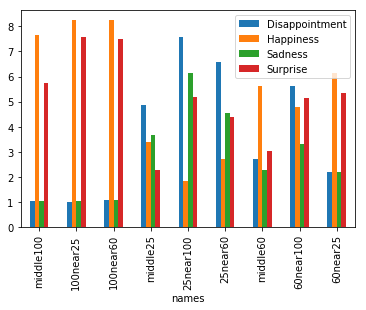

In [145]:
df.plot.bar()

Scenario
Middle       AxesSubplot(0.125,0.125;0.775x0.755)
Near Hit     AxesSubplot(0.125,0.125;0.775x0.755)
Near Miss    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

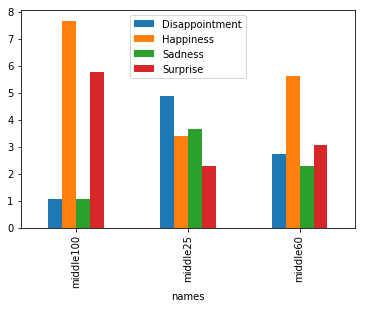

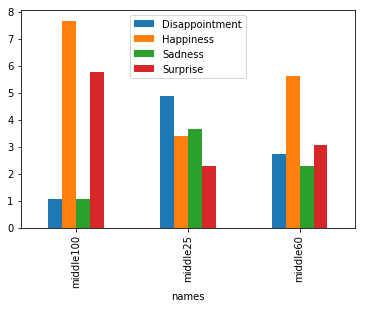

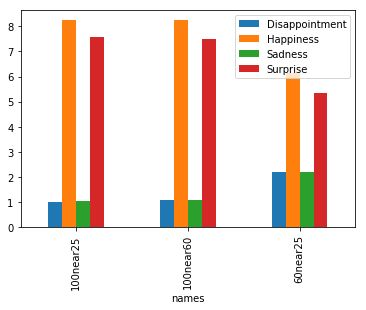

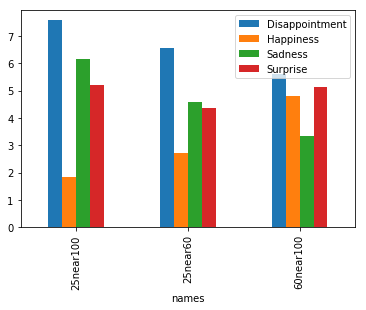

In [146]:
df.groupby('Scenario').plot.bar()

In [147]:
data = {e: groupby_scenario[e]['mean'] for e in emotions}
averages = pd.DataFrame(data = data)
averages

,Disappointment,Happiness,Sadness,Surprise
Scenario,,,,
Middle,2.873016,5.555556,2.333333,3.698413
Near Hit,1.428571,7.539683,1.444444,6.793651
Near Miss,6.587302,3.126984,4.682540,4.904762


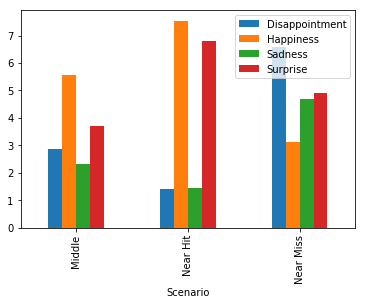

In [148]:
averages.plot.bar()

## Linear Regression

In [149]:
import sklearn.linear_model as lm
import sklearn.metrics as metrics
import numpy as np

In [162]:
linreg = lm.LinearRegression(n_jobs = 8, fit_intercept=True)

In [163]:
def NM(dist, at, near):
    return(1/dist * (at-near))

In [164]:
PV = .4 * 25 + .4 * 60 + .2 * 100
PV

54.0

### Near hits, misses, and middle

-------------------------------------------------------
Emotion: Happiness
coefs:
	Win:	 0.0309707000191
	PE:	 0.0309707000191
	absPE:	 -0.0114600437876
	NM:	 0.000630694092233

intercept: 	 3.56952672168

r2: 		 0.979521889476

-------------------------------------------------------
Emotion: Sadness
coefs:
	Win:	 -0.0182971850578
	PE:	 -0.0182971850578
	absPE:	 0.0145388615216
	NM:	 -0.000821827744905

intercept: 	 3.6961613897

r2: 		 0.933566720566

-------------------------------------------------------
Emotion: Surprise
coefs:
	Win:	 0.0229653285854
	PE:	 0.0229653285854
	absPE:	 0.0270593869732
	NM:	 -0.00061378792148

intercept: 	 2.80940890208

r2: 		 0.658111956811

-------------------------------------------------------
Emotion: Disappointment
coefs:
	Win:	 -0.0226282982417
	PE:	 -0.0226282982417
	absPE:	 0.0115968801314
	NM:	 -0.0013924110078

intercept: 	 4.88540921084

r2: 		 0.923104218604

-------------------------------------------------------


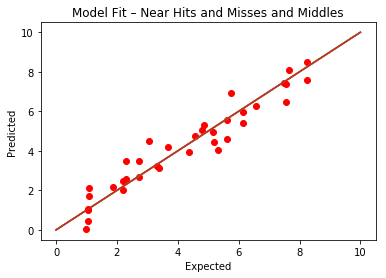

In [172]:
# get the variable data into X
values = [[25, 60], [60, 60], [60, 25], [60, 100], [100, 60], [100, 100], [25, 100], [25, 25], [100, 25]]
X = [[x[0], x[0] - PV, abs(x[0] - PV), NM(.05, x[0], x[1])] for x in values]
# get the target data into Y
targets = ['25near60', 'middle60', '60near25', '60near100', 'middle100', '100near60', '25near100', 'middle25', '100near25']
Y = [[df.loc[x][e] for x in targets] for e in emotions]

HM_coef = []
HM_intercept = []
print('-------------------------------------------------------')
for e in range(len(emotions)):
    HM_coef.append([])
    HM_intercept.append(0)
    print('Emotion:', emotions[e])
    line = linreg.fit(X, Y[e])
    HM_coef[e] = line.coef_
    HM_intercept[e] = line.intercept_
    print('coefs:')
    print('\tWin:\t', line.coef_[0])
    print('\tPE:\t', line.coef_[1])
    print('\tabsPE:\t', line.coef_[2])
    print('\tNM:\t', line.coef_[3])
    print('\nintercept:', '\t', line.intercept_)
    pred = []
    for i in range(len(X)):
        val = 0
        for j in range(len(X[i])):
            val = val + X[i][j] * HM_coef[e][j]
        val = val + HM_intercept[e]
        pred.append(val)
    plt.plot(Y[e], pred, 'ro')
    plt.plot([0,1,2,3,4,5,6,7,8,9,10])
    plt.title('Model Fit – Near Hits and Misses and Middles')
    plt.xlabel('Expected')
    plt.ylabel('Predicted')
    print('\nr2:', '\t\t', metrics.r2_score(Y[e], pred))
    print('\n-------------------------------------------------------')

### Near Misses and Near Hits

-------------------------------------------------------
Emotion: Happiness
coefs:
	Win:	 0.0292757309004
	PE:	 0.0292757309004
	absPE:	 -0.013341543514
	NM:	 0.000794590025359

intercept: 	 3.66377099912

r2: 		 0.994851055968

-------------------------------------------------------
Emotion: Sadness
coefs:
	Win:	 -0.0174175156188
	PE:	 -0.0174175156188
	absPE:	 0.0192426108374
	NM:	 -0.00088898281206

intercept: 	 3.75155598712

r2: 		 0.973048110692

-------------------------------------------------------
Emotion: Surprise
coefs:
	Win:	 0.0165401132908
	PE:	 0.0165401132908
	absPE:	 0.0266830870279
	NM:	 -8.7348548887e-05

intercept: 	 3.98198181129

r2: 		 0.962371711543

-------------------------------------------------------
Emotion: Disappointment
coefs:
	Win:	 -0.0147919277893
	PE:	 -0.0147919277893
	absPE:	 0.0114942528736
	NM:	 -0.00177796562412

intercept: 	 4.72316534041

r2: 		 0.975650692491

-------------------------------------------------------


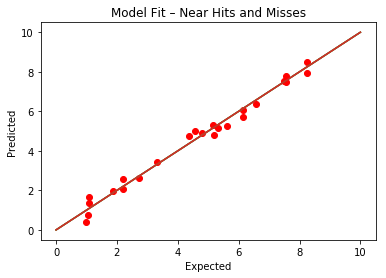

In [165]:
# get the variable data into X
values = [[25, 60], [60, 25], [60, 100], [100, 60], [25, 100], [100, 25]]
X = [[x[0], x[0] - PV, abs(x[0] - PV), NM(.05, x[0], x[1])] for x in values]
# get the target data into Y
targets = ['25near60', '60near25', '60near100', '100near60', '25near100', '100near25']
Y = [[df.loc[x][e] for x in targets] for e in emotions]

HM_coef = []
HM_intercept = []
print('-------------------------------------------------------')
for e in range(len(emotions)):
    HM_coef.append([])
    HM_intercept.append(0)
    print('Emotion:', emotions[e])
    line = linreg.fit(X, Y[e])
    HM_coef[e] = line.coef_
    HM_intercept[e] = line.intercept_
    print('coefs:')
    print('\tWin:\t', line.coef_[0])
    print('\tPE:\t', line.coef_[1])
    print('\tabsPE:\t', line.coef_[2])
    print('\tNM:\t', line.coef_[3])
    print('\nintercept:', '\t', line.intercept_)
    pred = []
    for i in range(len(X)):
        val = 0
        for j in range(len(X[i])):
            val = val + X[i][j] * HM_coef[e][j]
        val = val + HM_intercept[e]
        pred.append(val)
    plt.plot(Y[e], pred, 'ro')
    plt.plot([0,1,2,3,4,5,6,7,8,9,10])
    plt.title('Model Fit – Near Hits and Misses')
    plt.xlabel('Expected')
    plt.ylabel('Predicted')
    print('\nr2:', '\t\t', metrics.r2_score(Y[e], pred))
    print('\n-------------------------------------------------------')

### Near Misses

-------------------------------------------------------
Emotion: Happiness
coefs:
	Win:	 0.0258755734587
	PE:	 0.0258755734587
	absPE:	 -0.0170039482728
	NM:	 0.00107142857143

intercept: 	 4.06090250803

r2: 		 1.0

-------------------------------------------------------
Emotion: Sadness
coefs:
	Win:	 -0.0168540897393
	PE:	 -0.0168540897393
	absPE:	 0.0110755446858
	NM:	 -0.00196428571429

intercept: 	 2.80782141658

r2: 		 1.0

-------------------------------------------------------
Emotion: Surprise
coefs:
	Win:	 0.0077626720376
	PE:	 0.0077626720376
	absPE:	 -0.00510118448185
	NM:	 -0.0010119047619

intercept: 	 3.85160408574

r2: 		 1.0

-------------------------------------------------------
Emotion: Disappointment
coefs:
	Win:	 -0.0126580508
	PE:	 -0.0126580508
	absPE:	 0.0083181476686
	NM:	 -0.00125

intercept: 	 5.40457008584

r2: 		 1.0

-------------------------------------------------------


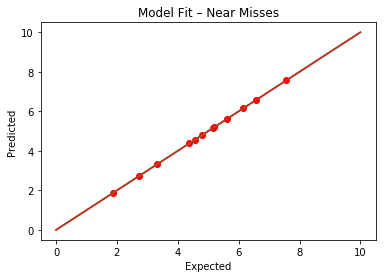

In [166]:
# get the variable data into X
values = [[25, 60], [60, 100], [25, 100]]
X = [[x[0], x[0] - PV, abs(x[0] - PV), NM(.05, x[0], x[1])] for x in values]
# get the target data into Y
targets = ['25near60', '60near100', '25near100']
Y = [[df.loc[x][e] for x in targets] for e in emotions]

M_coef = []
M_intercept = []
print('-------------------------------------------------------')
for e in range(len(emotions)):
    M_coef.append([])
    M_intercept.append(0)
    print('Emotion:', emotions[e])
    line = linreg.fit(X, Y[e])
    M_coef[e] = line.coef_
    M_intercept[e] = line.intercept_
    print('coefs:')
    print('\tWin:\t', line.coef_[0])
    print('\tPE:\t', line.coef_[1])
    print('\tabsPE:\t', line.coef_[2])
    print('\tNM:\t', line.coef_[3])
    print('\nintercept:', '\t', line.intercept_)
    pred = []
    for i in range(len(X)):
        val = 0
        for j in range(len(X[i])):
            val = val + X[i][j] * M_coef[e][j]
        val = val + M_intercept[e]
        pred.append(val)
    plt.plot(Y[e], pred, 'ro')
    plt.plot([0,1,2,3,4,5,6,7,8,9,10])
    plt.title('Model Fit – Near Misses')
    plt.xlabel('Expected')
    plt.ylabel('Predicted')
    print('\nr2:', '\t\t', metrics.r2_score(Y[e], pred))
    print('\n-------------------------------------------------------')

### Near Hits

-------------------------------------------------------
Emotion: Happiness
coefs:
	Win:	 0.0174603174603
	PE:	 0.0174603174603
	absPE:	 0.0174603174603
	NM:	 -3.46944695195e-18

intercept: 	 4.88571428571

r2: 		 1.0

-------------------------------------------------------
Emotion: Sadness
coefs:
	Win:	 -0.00907029478458
	PE:	 -0.00907029478458
	absPE:	 -0.00907029478458
	NM:	 -6.80272108844e-05

intercept: 	 2.89115646259

r2: 		 1.0

-------------------------------------------------------
Emotion: Surprise
coefs:
	Win:	 0.0177437641723
	PE:	 0.0177437641723
	absPE:	 0.0177437641723
	NM:	 0.000136054421769

intercept: 	 3.96054421769

r2: 		 1.0

-------------------------------------------------------
Emotion: Disappointment
coefs:
	Win:	 -0.00901360544218
	PE:	 -0.00901360544218
	absPE:	 -0.00901360544218
	NM:	 -0.000136054421769

intercept: 	 2.93469387755

r2: 		 1.0

-------------------------------------------------------


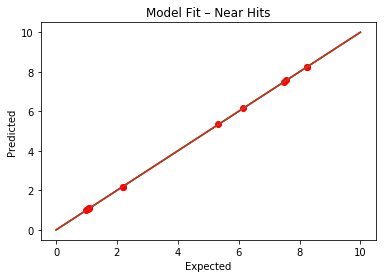

In [167]:
# get the variable data into X
values = [[60, 25],[100, 60], [100, 25]]
X = [[x[0], x[0] - PV, abs(x[0] - PV), NM(.05, x[0], x[1])] for x in values]
# get the target data into Y
targets = ['60near25', '100near60', '100near25']
Y = [[df.loc[x][e] for x in targets] for e in emotions]

H_coef = []
H_intercept = []
print('-------------------------------------------------------')
for e in range(len(emotions)):
    H_coef.append([])
    H_intercept.append(0)
    print('Emotion:', emotions[e])
    line = linreg.fit(X, Y[e])
    H_coef[e] = line.coef_
    H_intercept[e] = line.intercept_
    print('coefs:')
    print('\tWin:\t', line.coef_[0])
    print('\tPE:\t', line.coef_[1])
    print('\tabsPE:\t', line.coef_[2])
    print('\tNM:\t', line.coef_[3])
    print('\nintercept:', '\t', line.intercept_)
    pred = []
    for i in range(len(X)):
        val = 0
        for j in range(len(X[i])):
            val = val + X[i][j] * H_coef[e][j]
        val = val + H_intercept[e]
        pred.append(val)
    plt.plot(Y[e], pred, 'ro')
    plt.plot([0,1,2,3,4,5,6,7,8,9,10])
    plt.title('Model Fit – Near Hits')
    plt.xlabel('Expected')
    plt.ylabel('Predicted')
    print('\nr2:', '\t\t', metrics.r2_score(Y[e], pred))
    print('\n-------------------------------------------------------')

### Near Hits and Middle

-------------------------------------------------------
Emotion: Happiness
coefs:
	Win:	 0.0299890065382
	PE:	 0.0299890065382
	absPE:	 -0.0105305791819
	NM:	 0.00045304634612

intercept: 	 3.80629520338

r2: 		 0.995930462555

-------------------------------------------------------
Emotion: Sadness
coefs:
	Win:	 -0.0180200246605
	PE:	 -0.0180200246605
	absPE:	 0.00691605464409
	NM:	 -2.314413007e-05

intercept: 	 3.39402098335

r2: 		 0.999026060624

-------------------------------------------------------
Emotion: Surprise
coefs:
	Win:	 0.0219390266896
	PE:	 0.0219390266896
	absPE:	 0.00818611372148
	NM:	 0.00159231614882

intercept: 	 2.13607309455

r2: 		 0.950167736559

-------------------------------------------------------
Emotion: Disappointment
coefs:
	Win:	 -0.0268911223307
	PE:	 -0.0268911223307
	absPE:	 0.0203086000395
	NM:	 -0.000157958687728

intercept: 	 4.16062896667

r2: 		 0.990485925533

-------------------------------------------------------


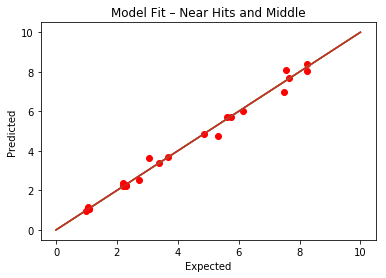

In [170]:
# get the variable data into X
values = [[60, 25], [60, 60],[100, 60], [100, 100], [100, 25], [25, 25]]
X = [[x[0], x[0] - PV, abs(x[0] - PV), NM(.05, x[0], x[1])] for x in values]
# get the target data into Y
targets = ['60near25', 'middle60', '100near60', 'middle100', '100near25', 'middle25']
Y = [[df.loc[x][e] for x in targets] for e in emotions]

H_coef = []
H_intercept = []
print('-------------------------------------------------------')
for e in range(len(emotions)):
    H_coef.append([])
    H_intercept.append(0)
    print('Emotion:', emotions[e])
    line = linreg.fit(X, Y[e])
    H_coef[e] = line.coef_
    H_intercept[e] = line.intercept_
    print('coefs:')
    print('\tWin:\t', line.coef_[0])
    print('\tPE:\t', line.coef_[1])
    print('\tabsPE:\t', line.coef_[2])
    print('\tNM:\t', line.coef_[3])
    print('\nintercept:', '\t', line.intercept_)
    pred = []
    for i in range(len(X)):
        val = 0
        for j in range(len(X[i])):
            val = val + X[i][j] * H_coef[e][j]
        val = val + H_intercept[e]
        pred.append(val)
    plt.plot(Y[e], pred, 'ro')
    plt.plot([0,1,2,3,4,5,6,7,8,9,10])
    plt.title('Model Fit – Near Hits and Middle')
    plt.xlabel('Expected')
    plt.ylabel('Predicted')
    print('\nr2:', '\t\t', metrics.r2_score(Y[e], pred))
    print('\n-------------------------------------------------------')

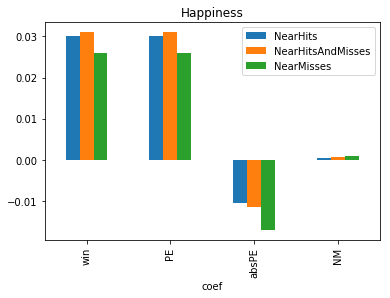

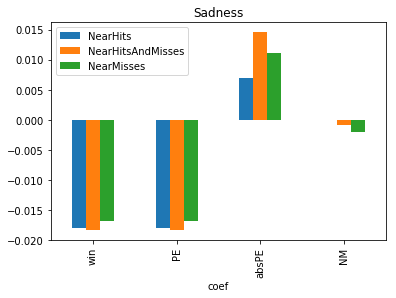

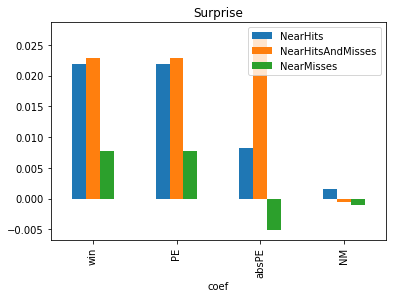

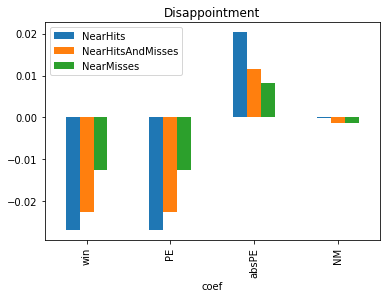

In [182]:
for i in range(len(emotions)):
    data = {'NearHitsAndMisses': HM_coef[i], 'NearMisses' : M_coef[i], 'NearHits' : H_coef[i]}
    dataframe = pd.DataFrame(data = data)
    dataframe['coef'] = ['win', 'PE', 'absPE', 'NM']
    dataframe = dataframe.set_index('coef')
    dataframe.plot.bar(title=emotions[i])